# Analysing the TMDB-Dataset and the IMDB-Dataset

## Import all the packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import the Datasets

In [3]:
tmdb = pd.read_csv("C:/Users/julia/OneDrive/Dokumente/Python Scripts/_Uni/_TMDB_analysis/TMDB_movie_dataset_v11.csv", usecols = ['imdb_id', 'production_countries', 'release_date'])

In [4]:
imdb = pd.read_csv("C:/Users/julia/OneDrive/Dokumente/Python Scripts/_Uni/_TMDB_analysis/title.basics.tsv", sep = '\t', usecols = ['tconst', 'titleType', 'startYear', 'genres'], dtype = {'tconst': str, 'titleType': str, 'startYear': str, 'genres': str}, na_values = '\\N')

## Parse the countries

In [5]:
def split_countries(x):
    if pd.isna(x):
        return []
    return [c.strip() for c in x.split(',') if c.strip()]

tmdb['countries'] = tmdb['production_countries'].apply(split_countries)
tmdb['year_tmdb'] = pd.to_datetime(tmdb['release_date']).dt.year

## Filter for Sports Genre

In [6]:
imdb = imdb[imdb['titleType'].isin(['movie', 'tvSeries'])]
imdb = imdb[imdb['genres'].str.contains('Sport', na = False)]
imdb['year'] = pd.to_numeric(imdb['startYear'], errors = 'coerce')

## Merge the Datasets

In [7]:
df = pd.merge(tmdb, imdb[['tconst', 'year']], left_on = 'imdb_id', right_on = 'tconst', how = 'inner')
df = df[['countries', 'year']].explode('countries')
df = df.dropna(subset = ['countries', 'year'])


## Calculate yearly counts

In [8]:
panel_sport = df.groupby(['countries', 'year']).size().reset_index(name='count')

## Define host years

In [11]:
host_years = {
    'United States of America': [1904, 1932, 1984, 1996], 
    'United Kingdom': [1908, 1948, 2012], 
    'France': [1900, 1924, 2024], 
    'Germany': [1936, 1972], 
    'Canada': [1976, 1988], 
    'Italy': [1960], 
    'Australia': [1956, 2000], 
    'Spain': [1992], 
    'Soviet Union': [1980], 
}

## Plot number of films per country and year with hosting years

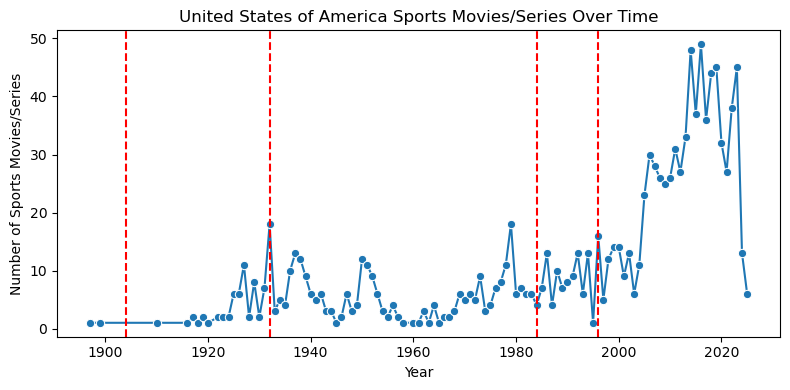

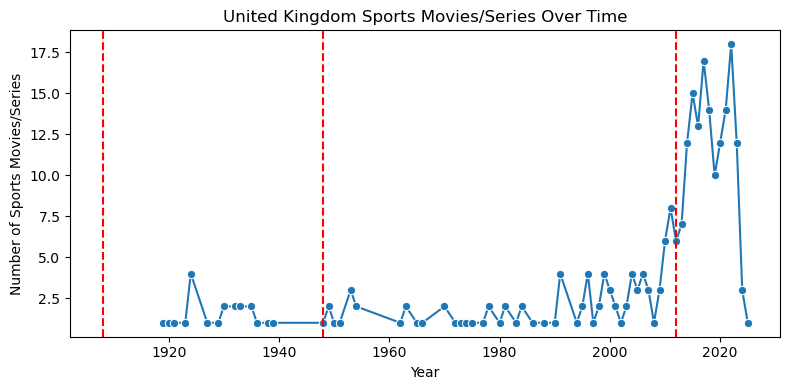

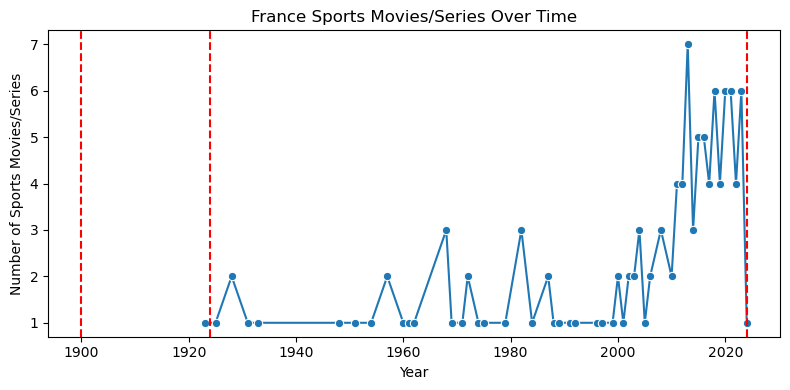

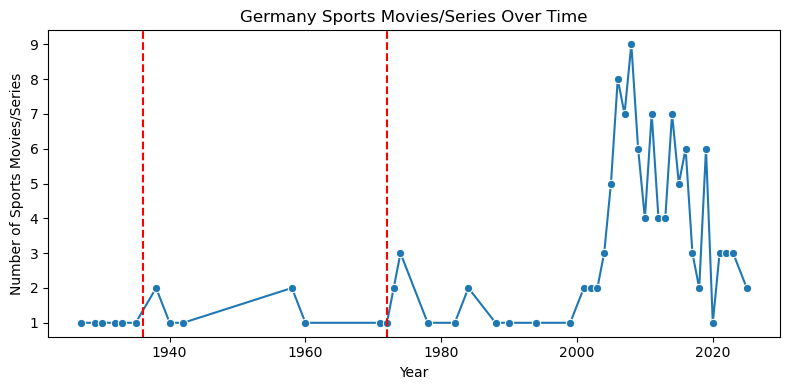

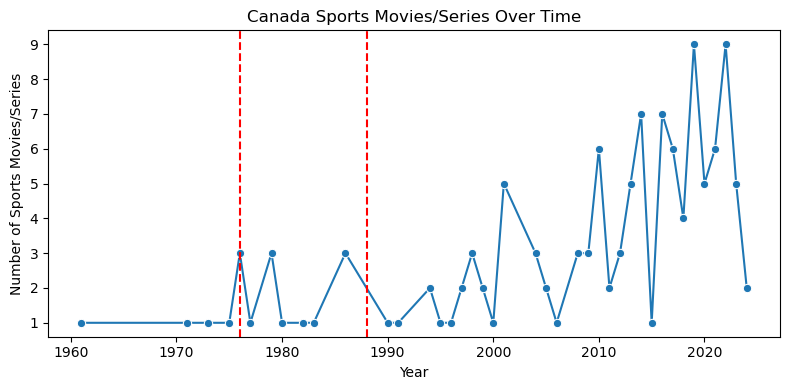

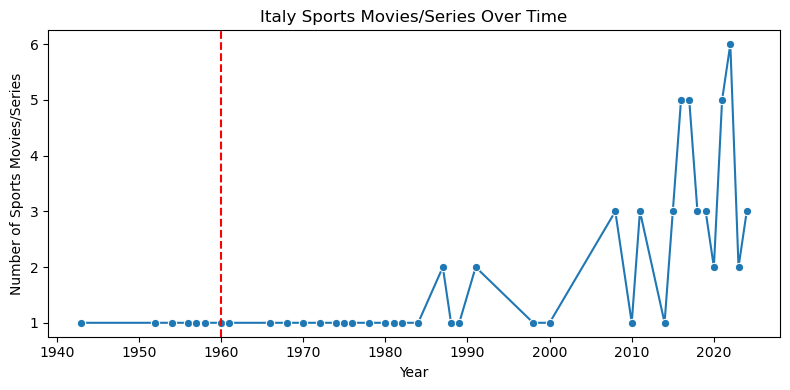

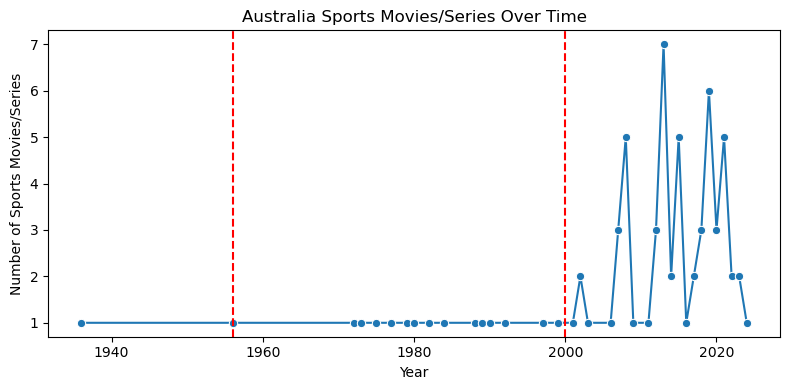

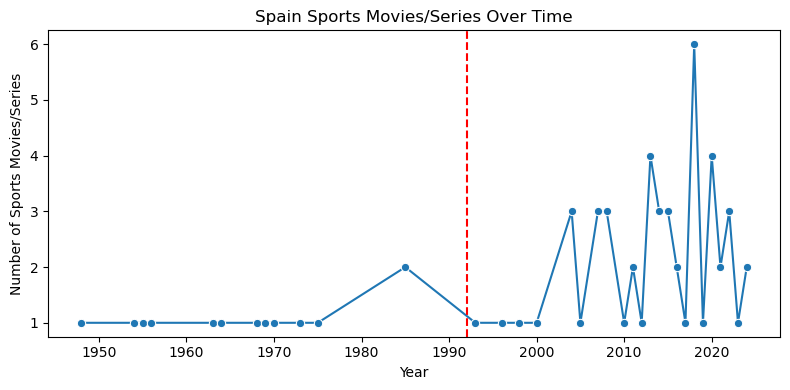

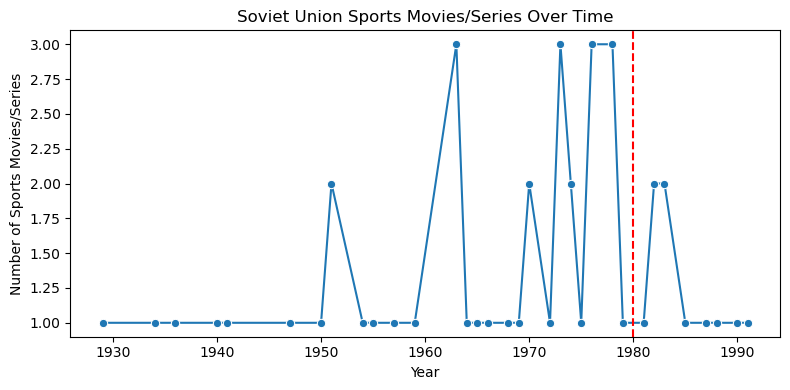

In [ ]:
for country, years in host_years.items():
    data = panel_sport[panel_sport['countries'] == country]
    plt.figure(figsize=(8, 4))
    sns.lineplot(data = data, x = 'year', y = 'count', marker = 'o')
    for hy in years: 
        plt.axvline(hy, color = 'red', linestyle = '--')
    plt.title(country + ' Sports Movies/Series Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Sports Movies/Series')
    plt.tight_layout()
    plt.show()
    
    